# Project Overview

You've been hired by the "Future 500 Magazine". The stakeholders have supplied you a list of 500 companies and would like you to create some draft visualizations for their upcoming online publication. 

They have requested the following charts:

* A scatterplot classified by industry showing revenue, expenses, and profit
* A scatterplot that includes the industry trends for the expenses vs. revenue relationship
* BoxPlots showing growth by industry

There are numerous discrepancies with the data that must be addressed before analysis can be performed.

In this section we will cover:

1. The factor variable trap
2. How to use gsub() and sub() for cleaning data
3. Methods for dealing with missing data
4. Dealing with the 3rd Logical Constant, NA
5. How to locate missing data with complete.cases()
6. Filtering techniques which() and is.na()
7. Median imputation for replacing missing data
8. Factual analysis and deriving values for replacing missing data

# Visualizations

Let's start with our results.

## A scatterplot classified by industry showing revenue, expenses, and profit

In [297]:
library(ggplot2)

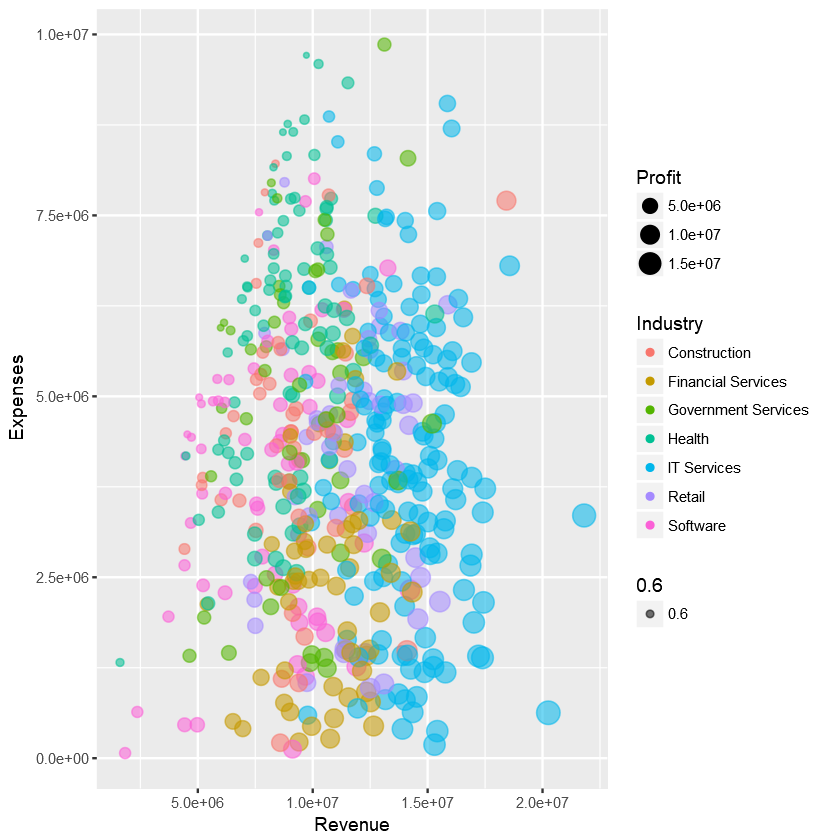

In [303]:
p = ggplot(data = fin)
p + geom_point(aes(x=Revenue, y=Expenses,
                  colour = Industry,
                  size = Profit,
                  alpha=.6))

## A scatterplot that includes the industry trends for the expenses vs. revenue relationship

`geom_smooth()` using method = 'loess'
Warning message:
"Removed 1 rows containing missing values (geom_smooth)."

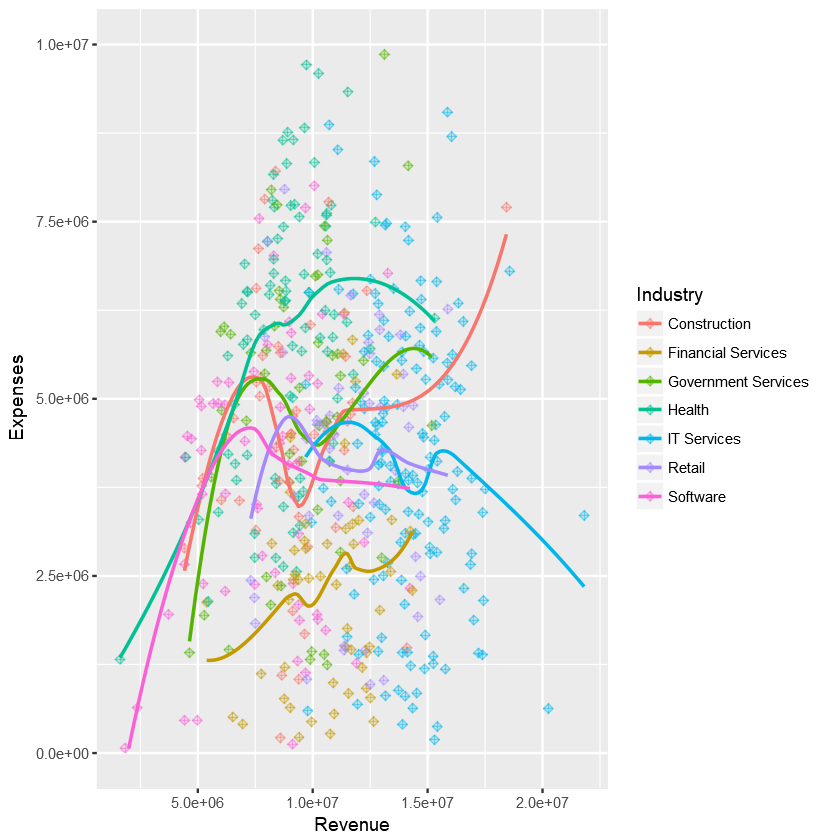

In [299]:
d = ggplot(data=fin, aes(x=Revenue, y=Expenses,
                  colour = Industry))
d + geom_point(shape=9, alpha=.5) + geom_smooth(fill=NA, size=.75)+ylim(0,10e+6)

## BoxPlots showing growth by industry

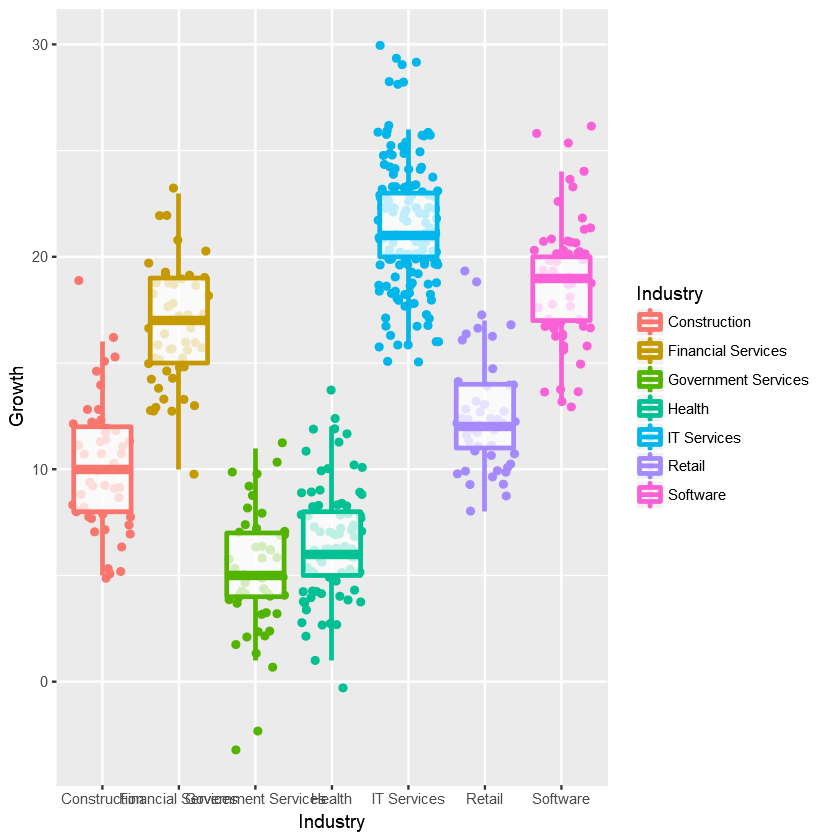

In [300]:
f = ggplot(data = fin, aes(x=Industry, y=Growth,
                          colour = Industry))
f+ geom_jitter()+ geom_boxplot(size=1, alpha=0.75, outlier.color=NA)

# Importing and understanding the dataset

In [140]:
options(width = 80)
fin = read.csv("Future-500.csv", na.strings = c(""))

In [141]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: int  2006 2009 2012 2011 2013 2013 2009 2013 2009 2010 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14 18 12 NA 26 16 ...


In [142]:
summary(fin)

       ID                        Name                   Industry  
 Min.   :  1.0   Abstractedchocolat:  1   IT Services       :146  
 1st Qu.:125.8   Abusivebong       :  1   Health            : 86  
 Median :250.5   Acclaimedcirl     :  1   Software          : 64  
 Mean   :250.5   Admitruppell      :  1   Financial Services: 54  
 3rd Qu.:375.2   Admonishbadelynge :  1   Construction      : 50  
 Max.   :500.0   Ahemparticular    :  1   (Other)           : 98  
                 (Other)           :494   NA's              :  2  
   Inception      Employees           State              City    
 Min.   :1999   Min.   :   1.00   CA     : 57   San Diego  : 13  
 1st Qu.:2009   1st Qu.:  27.25   VA     : 50   New York   : 11  
 Median :2011   Median :  56.00   TX     : 47   Reston     : 10  
 Mean   :2010   Mean   : 148.61   FL     : 34   Houston    :  9  
 3rd Qu.:2012   3rd Qu.: 126.00   MD     : 25   Austin     :  8  
 Max.   :2014   Max.   :7125.00   (Other):283   Minneapolis:  8  
 N

## Changing from non-factor to factor

In [143]:
fin$ID = factor(fin$ID)
fin$Inception = factor(fin$Inception)
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : int  8553827 13212508 8701897 10727561 4193069 8179177 3259485 NA 5274553 11412916 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14

# Factor Variable Trap

Changing from factor to non-factor

Example with numerics

In [144]:
a = c("12", "13", "14", "12", "12", "12")
typeof(a)

[1] "character"

In [145]:
b = as.numeric(a)
typeof(b)

[1] "double"

But what about factors?

In [146]:
z = factor(a)

In [147]:
as.numeric(z)

[1] 1 2 3 1 1 1

This is the factor variable trap!

The numerics stored are integer factorizations.

Let's fix that.

In [148]:
as.numeric(as.character(z))

[1] 12 13 14 12 12 12

Converting to character from their integer factorization fixed this.

## More relevant FVT Example

Converting factors from fin.

In [149]:
fin$Profit = factor(fin$Profit)
fin$Profit = as.numeric(as.character(fin$Profit))

This works here, but what about data that doesn't exactly match?

# Gsub and sub (all vs single replacements)

Revenue and Expenses; We want to convert these to numerics
Let's use Gsub because we want to change all cases

In [150]:
str(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : Factor w/ 498 levels "$1,614,585","$1,835,717",..: 479 194 485 246 402 141 308 NA 96 117 ...
 $ Expenses : Factor w/ 497 levels "1,026,548 Dollars",..: 6 485 3 248 227 247 57 NA 402 495 ...
 $ Profit   : num  8553827 13212508 8701897 10727561 4193069 ...
 $ Growth   : Factor w/ 32 levels "-2%","-3%","0%",..: 14 16 11 14 14 18 12 NA 26 16 ...


In [151]:
fin$Expenses = gsub(" Dollars", "", fin$Expenses)
fin$Expenses = gsub(",", "", fin$Expenses)
fin$Expenses = as.numeric(as.character(fin$Expenses))  

In [152]:
fin$Revenue = gsub("\\$","",fin$Revenue)
fin$Revenue = gsub(",","",fin$Revenue)
fin$Revenue = as.numeric(as.character(fin$Revenue))  

In [153]:
fin$Growth = gsub("%","",fin$Growth)
fin$Growth = as.numeric(as.character(fin$Growth))

In [154]:
str(fin)
summary(fin)

'data.frame':	500 obs. of  11 variables:
 $ ID       : Factor w/ 500 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Name     : Factor w/ 500 levels "Abstractedchocolat",..: 297 451 168 40 485 199 435 339 242 395 ...
 $ Industry : Factor w/ 7 levels "Construction",..: 7 5 6 5 7 5 2 1 5 2 ...
 $ Inception: Factor w/ 16 levels "1999","2000",..: 8 11 14 13 15 15 11 15 11 12 ...
 $ Employees: int  25 36 NA 66 45 60 116 73 55 25 ...
 $ State    : Factor w/ 42 levels "AL","AZ","CA",..: 36 33 35 3 41 27 22 29 3 8 ...
 $ City     : Factor w/ 297 levels "Addison","Alexandria",..: 94 181 105 195 151 154 53 295 232 26 ...
 $ Revenue  : num  9684527 14016543 9746272 15359369 8567910 ...
 $ Expenses : num  1130700 804035 1044375 4631808 4374841 ...
 $ Profit   : num  8553827 13212508 8701897 10727561 4193069 ...
 $ Growth   : num  19 20 16 19 19 22 17 NA 30 20 ...


       ID                      Name                   Industry     Inception  
 1      :  1   Abstractedchocolat:  1   IT Services       :146   2011   : 93  
 2      :  1   Abusivebong       :  1   Health            : 86   2010   : 83  
 3      :  1   Acclaimedcirl     :  1   Software          : 64   2012   : 80  
 4      :  1   Admitruppell      :  1   Financial Services: 54   2013   : 69  
 5      :  1   Admonishbadelynge :  1   Construction      : 50   2009   : 60  
 6      :  1   Ahemparticular    :  1   (Other)           : 98   (Other):114  
 (Other):494   (Other)           :494   NA's              :  2   NA's   :  1  
   Employees           State              City        Revenue        
 Min.   :   1.00   CA     : 57   San Diego  : 13   Min.   : 1614585  
 1st Qu.:  27.25   VA     : 50   New York   : 11   1st Qu.: 8695702  
 Median :  56.00   TX     : 47   Reston     : 10   Median :10647231  
 Mean   : 148.61   FL     : 34   Houston    :  9   Mean   :10845170  
 3rd Qu.: 126.00  

Notice we've retained the original values of the columns, while converting them to numeric data we can use!

# Dealing with missing Data

Choices that can be made

1. Predict with 100% accuracy
2. Leave the record as-is
3. Remove the record entirely
4. Replace with mean or median (preferred)
5. Fill in by exploring correlations and similarities
6. Introduce dummy fariable for "Missingness"

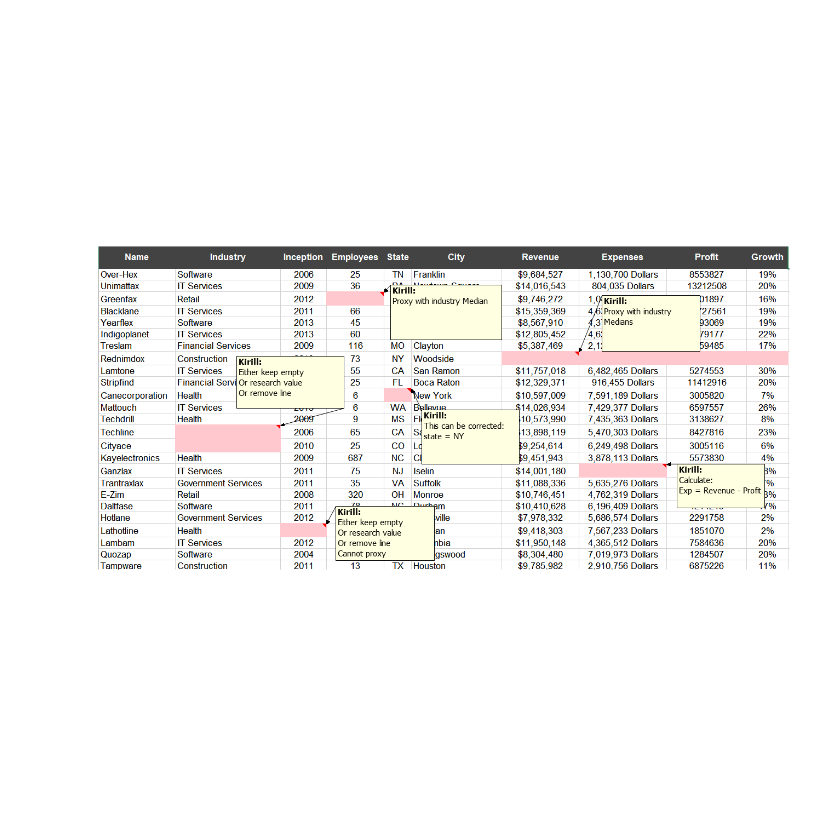

In [155]:
library(magick)
file = image_read('MissingData.png')
library(imager)
plot(file)
# Here we have examples of the missing data

* Industry: Remove values because the industry is important and we have no way to know where to place them.
* Inception: Leave as-is because it will not affect the outcome too much
* Employees: Proxy with the industry median because huge outliers will skew the mean
* State: Research and replace based on City, otherwise remove
* Numerics: Use industry medians, or for expenses, derive from Revenus-Profit

## What is an 'NA'?

NA is a logical constant of length 1 which contains a missing value indicator. NA can be coerced to any other vector type except raw. There are also constants NA\_integer\_, NA\_real\_, NA\_complex\_ and NA\_character\_ of the other atomic vector types which support missing values: all of these are reserved words in the R language.

## Let's locate the missing data

In [159]:
head(fin, 25)

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
2,Unimattax,IT Services,2009,36,PA,Newtown Square,14016543,804035,13212508,20
3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
4,Blacklane,IT Services,2011,66,CA,Orange,15359369,4631808,10727561,19
5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,12805452,4626275,8179177,22
7,Treslam,Financial Services,2009,116,MO,Clayton,5387469,2127984,3259485,17
8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
9,Lamtone,IT Services,2009,55,CA,San Ramon,11757018,6482465,5274553,30
10,Stripfind,Financial Services,2010,25,FL,Boca Raton,12329371,916455,11412916,20


Let's take a look at the Non-complete cases

Updated the import to replace empty entries with NA.
## Filtering: Using which() for non-missing data

In [163]:
fin[fin$Revenue == 9684527,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


NA will be included in results, let's fix that.

In [166]:
# Returns what is TRUE
fin[which(fin$Revenue == 9684527),]

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19


In [167]:
fin[fin$Employees == 45,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
137,137,Toughcare,Retail,2009,45,CA,Burbank,12429629,5796075,6633554,14
183,183,Ittech,IT Services,2013,45,MN,Minneapolis,11133739,6544488,4589251,20
200,200,Lalane,Retail,2003,45,MN,Golden Valley,12461526,4934351,7527175,14
208,208,Countslovenly,Construction,2010,45,FL,Spring Hill,8380367,8213905,166462,10
245,245,Peskyevaluate,IT Services,2010,45,VA,Richmond,13011611,4284410,8727201,23
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
360,360,Remembergabbro,Construction,2012,45,UT,Lindon,10878578,4515112,6363466,12
380,380,Pickyfive,IT Services,2011,45,CO,Denver,14826723,4458447,10368276,26


In [168]:
# Returns what is TRUE
fin[which(fin$Employees == 45),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
137,137,Toughcare,Retail,2009,45,CA,Burbank,12429629,5796075,6633554,14
183,183,Ittech,IT Services,2013,45,MN,Minneapolis,11133739,6544488,4589251,20
200,200,Lalane,Retail,2003,45,MN,Golden Valley,12461526,4934351,7527175,14
208,208,Countslovenly,Construction,2010,45,FL,Spring Hill,8380367,8213905,166462,10
245,245,Peskyevaluate,IT Services,2010,45,VA,Richmond,13011611,4284410,8727201,23
360,360,Remembergabbro,Construction,2012,45,UT,Lindon,10878578,4515112,6363466,12
380,380,Pickyfive,IT Services,2011,45,CO,Denver,14826723,4458447,10368276,26
435,435,Lucrepickled,IT Services,2004,45,VA,Glen Allen,12894933,3512395,9382538,17
487,487,Genusequ,Construction,2007,45,NC,Greensboro,8498464,5741773,2756691,11


## Filtering: using is.na() for missing data

In [176]:
fin[is.na(fin$Industry),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
14,14,Techline,NA,2006,65,CA,San Ramon,13898119,5470303,8427816,23
15,15,Cityace,NA,2010,25,CO,Louisville,9254614,6249498,3005116,6


In [177]:
fin[is.na(fin$Inception),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
22,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2


In [178]:
fin[is.na(fin$Employees),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
332,332,Westminster,Financial Services,2010,NA,MI,Troy,11861652,5245126,6616526,15


In [179]:
fin[is.na(fin$State),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
84,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
267,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20
379,379,Stovepuck,Retail,2013,73,NA,New York,13814975,5904502,7910473,10


In [181]:
fin[is.na(fin$Revenue),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


In [182]:
fin[is.na(fin$Expenses),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
17,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


In [183]:
fin[is.na(fin$Profit),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9


In [184]:
fin[is.na(fin$Growth),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA


# Removing records with missing data

Saving a backup

In [202]:
fin = fin_backup
fin_backup = fin

In [203]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
14,14,Techline,NA,2006,65,CA,San Ramon,13898119,5470303,8427816,23
15,15,Cityace,NA,2010,25,CO,Louisville,9254614,6249498,3005116,6
17,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
22,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
44,44,Ganzgreen,Construction,2010,224,TN,Franklin,NA,NA,NA,9
84,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
267,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20


Removing the two entries without an 'Industry'

In [204]:
fin = fin[!is.na(fin$Industry),]

## Resetting the dataframe index

In [205]:
head(fin, 15)

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
1,1,Over-Hex,Software,2006,25,TN,Franklin,9684527,1130700,8553827,19
2,2,Unimattax,IT Services,2009,36,PA,Newtown Square,14016543,804035,13212508,20
3,3,Greenfax,Retail,2012,NA,SC,Greenville,9746272,1044375,8701897,16
4,4,Blacklane,IT Services,2011,66,CA,Orange,15359369,4631808,10727561,19
5,5,Yearflex,Software,2013,45,WI,Madison,8567910,4374841,4193069,19
6,6,Indigoplanet,IT Services,2013,60,NJ,Manalapan,12805452,4626275,8179177,22
7,7,Treslam,Financial Services,2009,116,MO,Clayton,5387469,2127984,3259485,17
8,8,Rednimdox,Construction,2013,73,NY,Woodside,NA,NA,NA,NA
9,9,Lamtone,IT Services,2009,55,CA,San Ramon,11757018,6482465,5274553,30
10,10,Stripfind,Financial Services,2010,25,FL,Boca Raton,12329371,916455,11412916,20


Notice the missing values!

In [206]:
rownames(fin) = 1:nrow(fin)

This reindexes the dataset.

## Factual Analysis, replacing missing data

### State column

In [207]:
fin[is.na(fin$State),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NA,New York,10597009,7591189,3005820,7
82,84,Drilldrill,Software,2010,30,NA,San Francisco,7800620,2785799,5014821,17
265,267,Circlechop,Software,2010,14,NA,San Francisco,9067070,5929828,3137242,20
377,379,Stovepuck,Retail,2013,73,NA,New York,13814975,5904502,7910473,10


In [208]:
fin[is.na(fin$State) & fin$City == "New York", "State"] <- "NY"

Check!

In [209]:
fin[c(11,377),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
11,11,Canecorporation,Health,2012,6,NY,New York,10597009,7591189,3005820,7
377,379,Stovepuck,Retail,2013,73,NY,New York,13814975,5904502,7910473,10


In [210]:
fin[is.na(fin$State) & fin$City == "San Francisco", "State"] <- "CA"

In [212]:
fin[c(82,265),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
82,84,Drilldrill,Software,2010,30,CA,San Francisco,7800620,2785799,5014821,17
265,267,Circlechop,Software,2010,14,CA,San Francisco,9067070,5929828,3137242,20


Success!

## Median Imputation, replacing missing data

### Employees Column

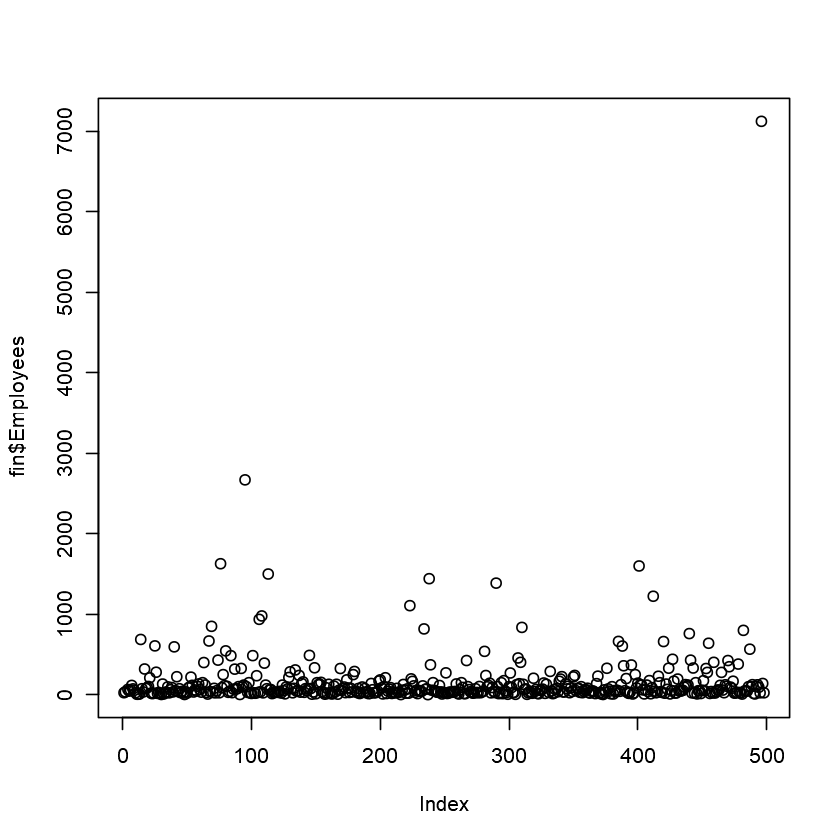

In [225]:
plot(fin$Employees)

Notice the vast majority of companies have less than 200 employees, and the roughly 50 outliers will pump the mean up! So we will use the median

In [233]:
med_empl_retail = median(fin[fin$Industry == "Retail","Employees"], na.rm=TRUE)

In [234]:
med_empl_retail

[1] 28

In [236]:
med_empl_fs = median(fin[fin$Industry == "Financial Services","Employees"], na.rm=TRUE)
med_empl_fs

[1] 80

In [235]:
fin[is.na(fin$Employees) & fin$Industry == "Retail", "Employees"] <- med_empl_retail

In [237]:
fin[is.na(fin$Employees) & fin$Industry == "Financial Services", "Employees"] <- med_empl_fs

In [238]:
fin[is.na(fin$Employees),]

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth


Success!

### Median Imputation on Growth column

In [239]:
med_growth_constr = median(fin[fin$Industry== "Construction","Growth"],na.rm=TRUE)

In [241]:
fin[is.na(fin$Growth)&fin$Industry=="Construction", "Growth"]<-med_growth_constr

In [244]:
fin[!complete.cases(fin$Growth),]

ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth


### Revenue Column

In [246]:
med_rev_constr = median(fin[fin$Industry=="Construction","Revenue"],na.rm=TRUE)
fin[is.na(fin$Revenue)& fin$Industry=="Construction","Revenue"]<-med_rev_constr
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,NA,NA,10
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,NA,NA,9


### Profit Column

In [248]:
med_prof_constr = median(fin[fin$Industry=="Construction","Profit"],na.rm=TRUE)
fin[is.na(fin$Profit)& fin$Industry=="Construction","Profit"]<-med_prof_constr
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
8,8,Rednimdox,Construction,2013,73,NY,Woodside,9055059,NA,4573281,10
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
42,44,Ganzgreen,Construction,2010,224,TN,Franklin,9055059,NA,4573281,9


### Expenses column

In [251]:
med_exp_constr = median(fin[fin$Industry=="Construction","Expenses"],na.rm=TRUE)
fin[is.na(fin$Expenses)&fin$Industry=="Construction","Expenses"]<- med_exp_constr
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,NA,11901180,18
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2


In [255]:
fin[is.na(fin$Expenses),"Expenses"]<-fin[
    is.na(fin$Expenses),"Revenue"]-fin[
    is.na(fin$Expenses),"Profit"]
fin[15,]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
15,17,Ganzlax,IT Services,2011,75,NJ,Iselin,14001180,2100000,11901180,18


In [256]:
fin[!complete.cases(fin),]

,ID,Name,Industry,Inception,Employees,State,City,Revenue,Expenses,Profit,Growth
20,22,Lathotline,Health,NA,103,VA,McLean,9418303,7567233,1851070,2
